In [5]:
#!pip install Split-folders
import splitfolders

In [6]:
data = r"D:\Datasets\Dog and Cat .png"
splitfolders.ratio(data,output = r"D:\Datasets\Dog and Cat 2.png", ratio= (0.7,0.2,0.1))

Copying files: 1000 files [00:02, 471.04 files/s]


In [7]:
train = r"D:\Datasets\Dog and Cat 2.png\train"
test = r"D:\Datasets\Dog and Cat 2.png\test"
val = r"D:\Datasets\Dog and Cat 2.png\val"

In [8]:
image_width = 80
image_height = 80
batch_size = 10

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(rescale = 1/255, zoom_range = 0.2,rotation_range = 0.2,
                            width_shift_range = 0.2, height_shift_range = 0.2)


train = datagen.flow_from_directory(train, batch_size = batch_size, target_size = (image_width, image_height),shuffle = True)

test = datagen.flow_from_directory(test, batch_size = batch_size, target_size = (image_width, image_height),shuffle = True)

val = datagen.flow_from_directory(val, batch_size = batch_size, target_size = (image_width, image_height),shuffle = True)

Found 700 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [11]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), input_shape= (image_width, image_height, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(2, activation = 'sigmoid'))

In [28]:
model.compile(optimizer = 'adagrad', loss = 'binary_crossentropy', metrics = ['Accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10368)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [30]:
train_ = model.fit(train,
                  validation_data = val,
                  epochs = 10,
                  batch_size = 200)

Epoch 1/10
70/70 [==============================] - 19s 260ms/step - loss: 0.6932 - Accuracy: 0.5043 - val_loss: 0.6911 - val_Accuracy: 0.5350
Epoch 2/10
70/70 [==============================] - 18s 260ms/step - loss: 0.6915 - Accuracy: 0.5143 - val_loss: 0.6903 - val_Accuracy: 0.5300
Epoch 3/10
70/70 [==============================] - 18s 257ms/step - loss: 0.6900 - Accuracy: 0.5243 - val_loss: 0.6916 - val_Accuracy: 0.5400
Epoch 4/10
70/70 [==============================] - 18s 261ms/step - loss: 0.6897 - Accuracy: 0.5300 - val_loss: 0.6860 - val_Accuracy: 0.5200
Epoch 5/10
70/70 [==============================] - 19s 263ms/step - loss: 0.6905 - Accuracy: 0.5571 - val_loss: 0.6877 - val_Accuracy: 0.5700
Epoch 6/10
70/70 [==============================] - 19s 266ms/step - loss: 0.6864 - Accuracy: 0.5629 - val_loss: 0.6917 - val_Accuracy: 0.5250
Epoch 7/10
70/70 [==============================] - 18s 254ms/step - loss: 0.6859 - Accuracy: 0.5729 - val_loss: 0.6871 - val_Accuracy: 0.5600

In [31]:
model.evaluate(test)

10/10 [==============================] - 1s 140ms/step - loss: 0.6818 - Accuracy: 0.5800


[0.6818327307701111, 0.5799999833106995]

In [32]:
accuracy = train_.history["Accuracy"]
val_accuracy = train_.history["val_Accuracy"]

loss = train_.history["loss"]
val_loss = train_.history["val_loss"]

epochs = range(len(accuracy))

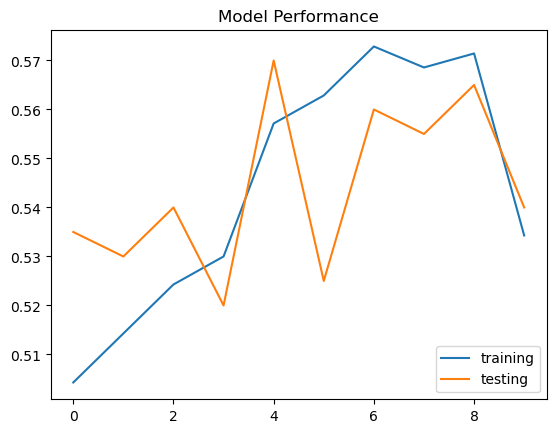

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, label = "training")
plt.plot(epochs, val_accuracy, label = "testing")

plt.title("Model Performance")
plt.legend(loc = "lower right")
plt.figure()
plt.show()